#Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студентки гр. 2384 Соц Екатерина Андреевна и Лавренова Юлия Дмитриевна. Вариант №17.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
1. Аналоговый сигнал:

$$x(t) = \sum_{k=1}^{11} A_kcos(\omega_kt + \phi_k)$$, где

$A_k$ - амплитуды гармоник, представляющие целые числа со значениями от 1 до 11, сгенерированные случайным образом

$\omega_k$ - частоты гармоник, изменяющиеся с шагом $0.1\pi$ от 0 до $\pi$

$\phi_k$ - начальные фазы, предстваляющие собой случайные числа в промежутке от 0 до 0.5

2. Формула ДПФ

$$X(n) = \sum_{k=0}^{N-1} x_k e^{-ik\frac{2\pi n}{N}}$$

, где $N$ - число отсчетов, $n = 0,1,2,..., N-1$

3. Передаточная функия нерекурсивных фильтров:
$H(\omega) = h_0 + 2 \sum_{k=1}^{m} h_k cos(k\omega)$

Для линейного сглаживания $h_k = \frac{1}{2m+1}$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$
 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(\omega_kt+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).
2. Визуализировать исходные аналоговый и дискретизированный сигналы.
3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для  $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.
5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.
6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.
7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.
8. Повторить п. 4–7 для следующих фильтров:

*   Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
*   Сглаживание полиномом 4-ой степени по 7 и 11 узлам.
9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

**1.** Формирование дискретного сигнала

Для формирования дискретного сигнала необходимо сначала сформировать аналоговый сигнал вида:

$$x(t) = \sum_{k=1}^{11} A_kcos(\omega_kt + \phi_k)$$, где

$A_k$ - амплитуды гармоник, представляющие целые числа со значениями от 1 до 11, сгенерированные случайным образом

$\omega_k$ - частоты гармоник, изменяющиеся с шагом $0.1\pi$ от 0 до $\pi$

$\phi_k$ - начальные фазе, предстваляющие собой случайные числа в промежутке от 0 до 0.5

Дискретный сигнал формируется путем дискретизации аналогового сигнала с шагом T=1. Всего отсчетов N=32:

$$x(n) = \sum_{k=1}^{11} A_kcos(\omega_kn + \phi_k), n=0, ..., N-1$$

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#частоты гармоник
w = [0]
w_k = 0
while w_k < math.pi:
  w_k += 0.1*math.pi
  w.append(w_k)

np.random.seed(42)
#амплитуды гармоник
amplitudes_gen = np.random.randint(1, 12, size=11)
sum_amp = sum(amplitudes_gen)
amplitudes = [a/sum_amp for a in amplitudes_gen]

#фазы гармоник
phi_k = np.random.uniform(0, 0.5, size=11)

#шаг дискретизации
T = 1
N = 32
t_x = np.arange(N) * T
t = np.linspace(0,31,1000)

signal_analog = np.zeros_like(t)
for i in range(11):
  signal_analog += amplitudes[i] * np.cos(w[i] * t + phi_k[i])

digital_signal = np.zeros(N)
for i in range(N):
  idx = np.argmin(np.abs(t - t_x[i]))
  digital_signal[i] = signal_analog[idx]


**2.** Визуализация аналогового и дискретного сигнала

/tmp/ipython-input-3485366236.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


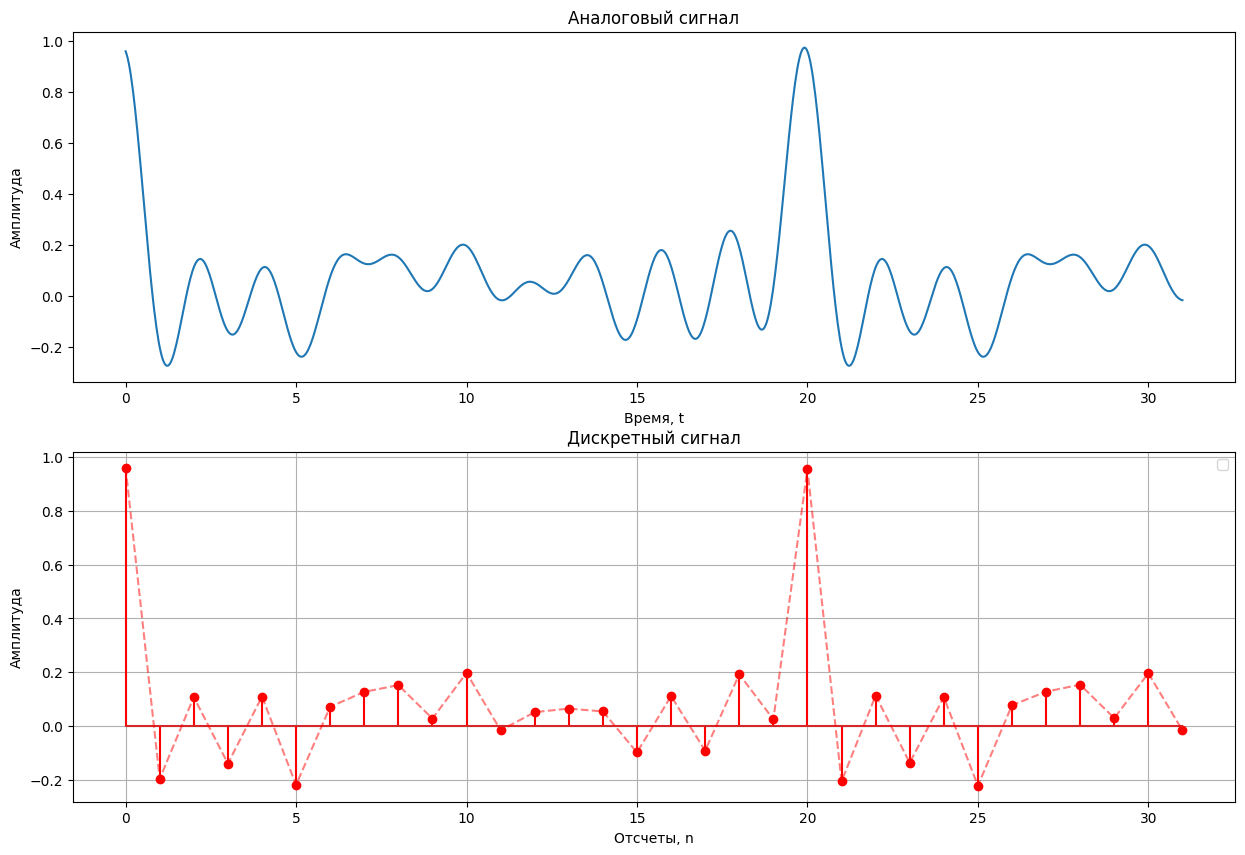

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
# График сигнала
plt.plot(t, signal_analog)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Аналоговый сигнал')

plt.subplot(2, 1, 2)
plt.stem(t_x, digital_signal, 'ro-')
plt.plot(t_x, digital_signal, 'r--', alpha=0.5)
plt.xlabel('Отсчеты, n')
plt.ylabel('Амплитуда')
plt.title(f'Дискретный сигнал')
plt.grid(True)
plt.legend()

**3.** Применение ДПФ для нахождения дискретных отсчетов спектра дискретного сигнала

Для нахождения дискретного спектра дискретного сигнала используется формула ДПФ

$$X(n) = \sum_{k=0}^{N-1} x_k e^{-ik\frac{2\pi n}{N}}$$

, где $N$ - число отсчетов, $n = 0,1,2,..., N-1$

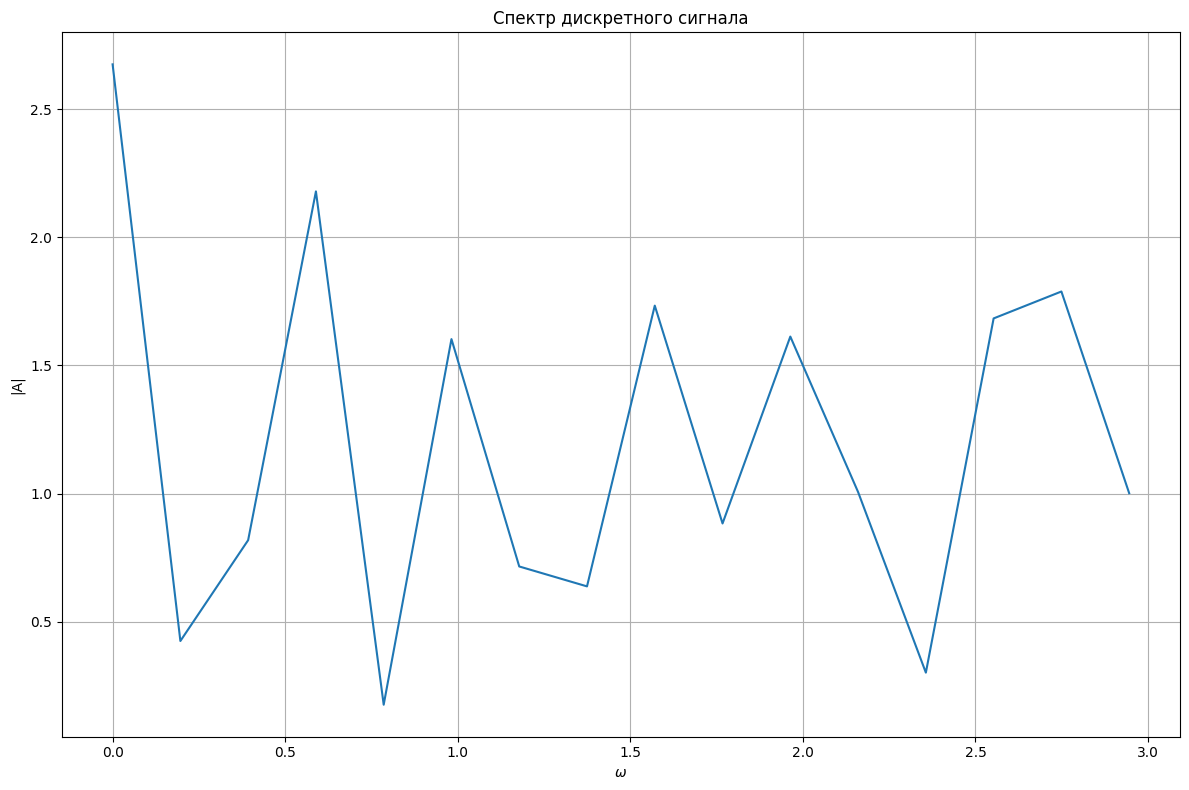

In [ ]:
#функция вычисления ДПФ
def dft(x):
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2*np.pi * k * n / N)
    return X

spectrum = dft(digital_signal)[:N//2]
omega = 2 * np.pi * np.arange(N) / N

plt.figure(figsize=(12,8))
plt.plot(omega[:N//2], np.abs(spectrum))
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала')
plt.grid(True)
plt.tight_layout()
plt.show()


**4.** Применение линейного сглаживания по 5-ти и 9-ти точкам

Формула линейного сглаживания для $2m+1$ точек

$$y_n = \frac{1}{2m+1} \sum_{k=n-m}^{k=n+m}s_k$$

Для 5 и 9 точек соответственно формула следующая:

$$y5_n = \frac{1}{5} \sum_{k=n-2}^{k=n+2}s_k$$

$$y9_n = \frac{1}{9} \sum_{k=n-4}^{k=n+4}s_k$$

Получим формулу передаточной функции $H(\omega)$ для данного фильтра:

Так как $s_n = e^{i\omega n}$:

$$y5_n = \frac{1}{5}(s_{n-2}+s_{n-1}+s_n+s_{n+1}+s{n+2}) = \frac{1}{5}(e^{(n-2)i\omega}+e^{(n-1)i\omega}+e^{ni\omega}+e^{(n+1)i\omega}+e^{(n+2)i\omega}) = \frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})e^{ni\omega}= H(\omega)*e^{ni\omega}$$

$$H(\omega) = \frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})= \frac{1}{5}(cos(2\omega)-isin(2\omega)+cos(\omega)-isin(\omega)+1+cos(\omega)+isin(\omega)+cos(2\omega)+isin(2\omega)) = \frac{1}{5}(1+2cos(\omega)+2cos(2\omega))
$$

Аналогично для 9-ти точек:

$$H(\omega) = \frac{1}{9}(e^{-4i\omega}+e^{-3i\omega}+e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega}+e^{3i\omega}+e^{4i\omega}) = \frac{1}{9}(1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))
$$

In [ ]:
#функция вычисления линеного сглаживания
def liner_filter(n, x):
  y = np.zeros_like(x)
  half_window_size = (n - 1) // 2

  for i in range(len(x)):
      s = 0
      cnt = 0
      for k in range(-half_window_size, half_window_size + 1):
          idx = i + k
          if 0 <= idx < len(x):
              s += x[idx]
              cnt += 1
      y[i] = s / cnt
  return y

digital_signal_5 = liner_filter(5, digital_signal)
digital_signal_9 = liner_filter(9, digital_signal)


**5.** Визуализация

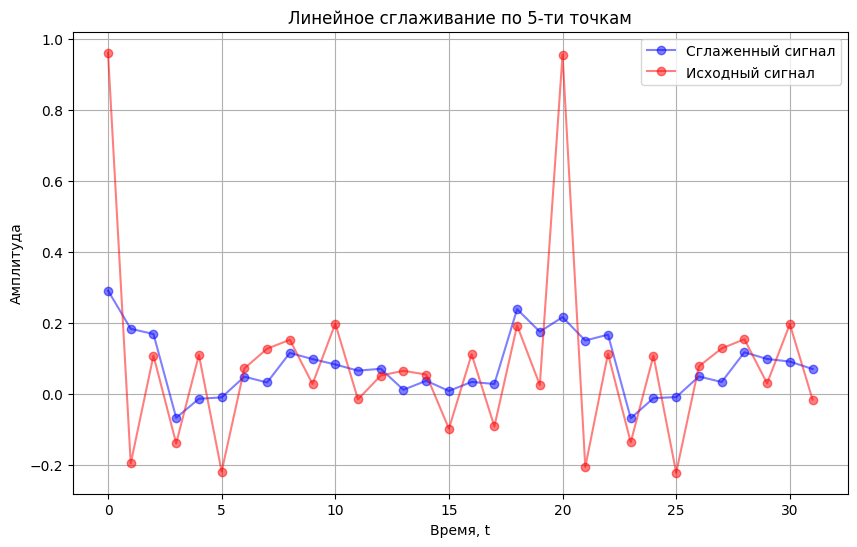

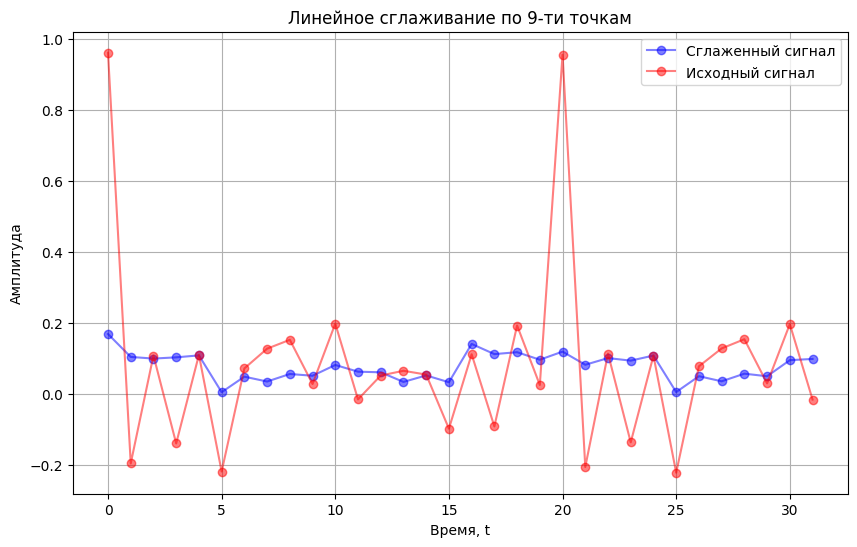

In [ ]:
#функция отрисовки сглаживания
def plot_smoothing(t, signal, title):
  plt.figure(figsize=(10,6))

  # График сигнала
  plt.plot(t, signal, 'bo-', alpha=0.5, label='Сглаженный сигнал')
  plt.plot(t, digital_signal, 'ro-', alpha=0.5, label='Исходный сигнал')
  plt.xlabel('Время, t')
  plt.ylabel('Амплитуда')
  plt.title(title)
  plt.grid(True)
  plt.legend()


plot_smoothing(t_x, digital_signal_5, "Линейное сглаживание по 5-ти точкам")
plot_smoothing(t_x, digital_signal_9, "Линейное сглаживание по 9-ти точкам")

**6.** ДПФ для линейно сглаженного дискретного сигнала

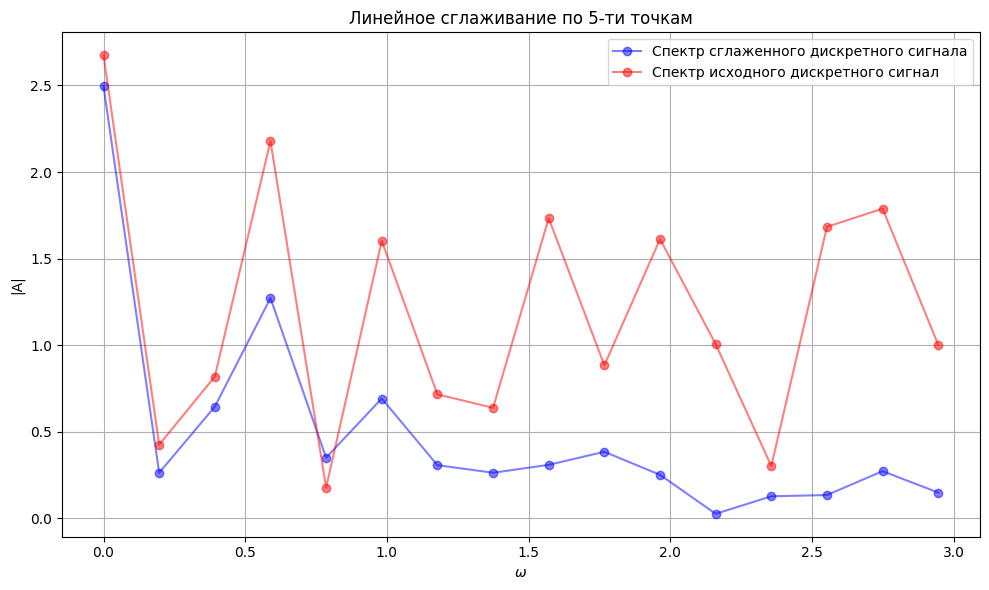

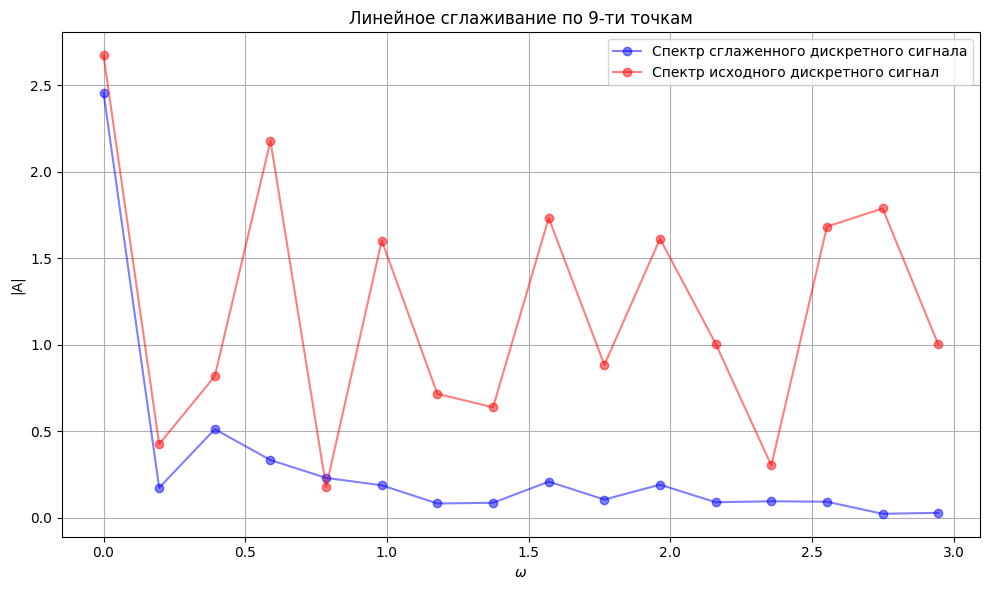

In [ ]:
#функция отрисовки спектра
def plot_spectrum(smooth_spectrum, title):
  plt.figure(figsize=(10,6))
  # График сигнала
  omega = 2 * np.pi * np.arange(N) / N
  plt.plot(omega[:N//2], abs(smooth_spectrum), 'bo-', alpha=0.5, label='Спектр сглаженного дискретного сигнала')
  plt.plot(omega[:N//2], abs(spectrum), 'ro-', alpha=0.5, label='Спектр исходного дискретного сигнал')
  plt.xlabel('$\\omega$')
  plt.ylabel('|A|')
  plt.title(title)
  plt.legend()

  plt.grid(True)
  plt.tight_layout()


dpf_liner5 = dft(digital_signal_5)[:N//2]
dpf_liner9 = dft(digital_signal_9)[:N//2]

plot_spectrum(dpf_liner5, "Линейное сглаживание по 5-ти точкам")
plot_spectrum(dpf_liner9, "Линейное сглаживание по 9-ти точкам")


Применяя функции сглаживания, амплитуда дискретного сигнала значительно уменьшается, причем подавление увеличивается с увеличением числа точек, используемых в фильтрации.

При построении спектров исходного дискретного сигнала и дискретных сигналов с применением фильтрации видно, что с увеличением частоты, также увеличивается и подавление амплитуды, с увеличением числа точек в фильтре, подавление сильнее и наступает на меньших частотах.

**7.** Анализ результатов со значениями $H(\omega)$

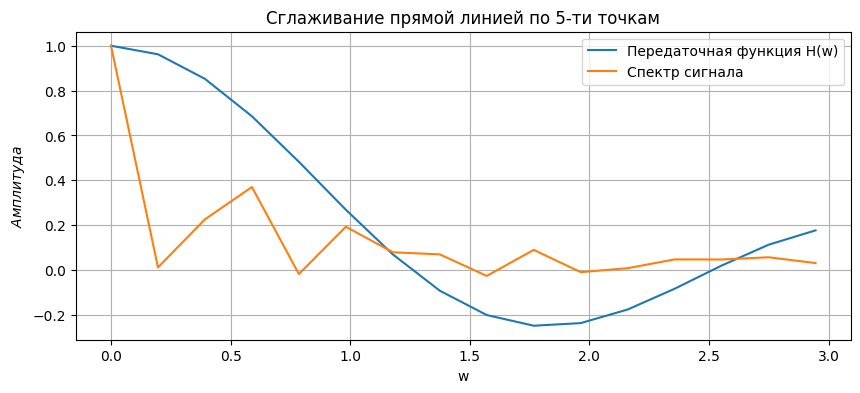

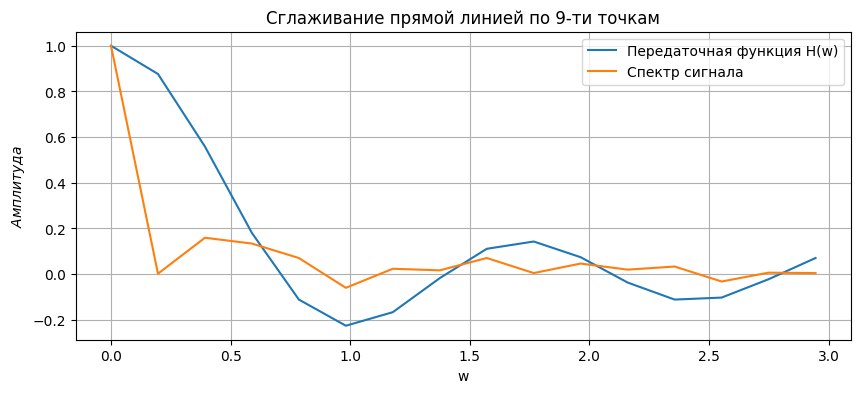

In [ ]:
h_lin = {}
n_points = [5, 9]

omega = 2 * np.pi * np.arange(N) / N

def H_avg(w, n):
    K = (n - 1) // 2
    H = 1 + 2 * np.sum([np.cos(w * k) for k in range(1, K + 1)], axis=0)
    return H / n

for n in n_points:
    h_lin[n] = H_avg(omega[:N//2], n)

# График
plt.figure(figsize=(10, 4))
plt.plot(omega[:N//2], h_lin[5], label='Передаточная функция H(w)')
plt.plot(omega[:N//2], dpf_liner5/max(dpf_liner5), label='Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание прямой линией по 5-ти точкам')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(omega[:N//2], h_lin[9], label='Передаточная функция H(w)')
plt.plot(omega[:N//2], dpf_liner9/max(dpf_liner9), label='Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание прямой линией по 9-ти точкам')
plt.legend()
plt.grid(True)
plt.show()

В результате сравнения графиков аналитической передаточной функции линейного фильтра и спектра дискретного сигнала, полученного с помощью ДПФ, видно, что их частотные зависимости практически совпадают. Это подтверждает, что вычисленный спектр корректно отражает частотные свойства фильтра и соответствует теоретической передаточной функции.

**8.** Сглаживание полиномом второй степени для 5-ти и 9-ти узлов

Формула для сглаживания полиномом второй степени для 5-ти и 9-ти узлов:

$$y_5= \frac{1}{35}(-3s_{n-2}+12s_{n-1}+17s_n+12s_{n+1}-3s_{n+2})$$

$$y_9= \frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_n+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$

Получим формулу передаточной функции $H(\omega)$ для данного фильтра:

Так как $s_n = e^{i\omega n}$:

$$y5_n = \frac{1}{35}(-3e^{(n-2)i\omega}+12e^{(n-1)i\omega}+17e^{ni\omega}+12e^{(n+1)i\omega}-3e^{(n+2)i\omega}) = \frac{1}{35}(-3e^{-2i\omega}+12e^{-i\omega}+17+12e^{i\omega}-3e^{2i\omega})e^{ni\omega}= H(\omega)*e^{ni\omega}$$

$$H(\omega) = \frac{1}{35}(-3e^{-2i\omega}+12e^{-i\omega}+17+12e^{i\omega}-3e^{2i\omega})= \frac{1}{35}(-3(cos(2\omega)-isin(2\omega))+12(cos(\omega)-isin(\omega))+17+12(cos(\omega)+isin(\omega))-3(cos(2\omega)+isin(2\omega))) = \frac{1}{35}(17+24cos(\omega)-6cos(2\omega))
$$

Аналогично для 9-ти точек:

$$H(\omega) = \frac{1}{231}(-21e^{-4i\omega}+14e^{-3i\omega}+39e^{-2i\omega}+54e^{-i\omega}+59+54e^{i\omega}+39e^{2i\omega}+14e^{3i\omega}-21e^{4i\omega}) = \frac{1}{231}(59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega))
$$


In [ ]:
#функция вычисления сглаживания полинимом 2-ой степени
def poly2_filter(n, x, koeffs, alpha_):
  y = np.zeros_like(x)
  half_window_size = (n - 1) // 2

  for i in range(len(x)):
      s = 0
      for k in range(-half_window_size, half_window_size + 1):
          idx = i + k
          if 0 <= idx < len(x):
              s += x[idx]*koeffs[k+half_window_size]
      y[i] = s / alpha_
  return y

koeffs_5 = [-3, 12, 17, 12, -3]
koeffs_9 = [-21, 14, 39, 54, 59, 54, 39, 14, -21]
digital_signal_5_poly2 = poly2_filter(5, digital_signal, koeffs_5, 35)
digital_signal_9_poly2 = poly2_filter(9, digital_signal, koeffs_9, 231)

Визуализация сглаженных дискретных сигналов с помощью полиномов 2-ой степени

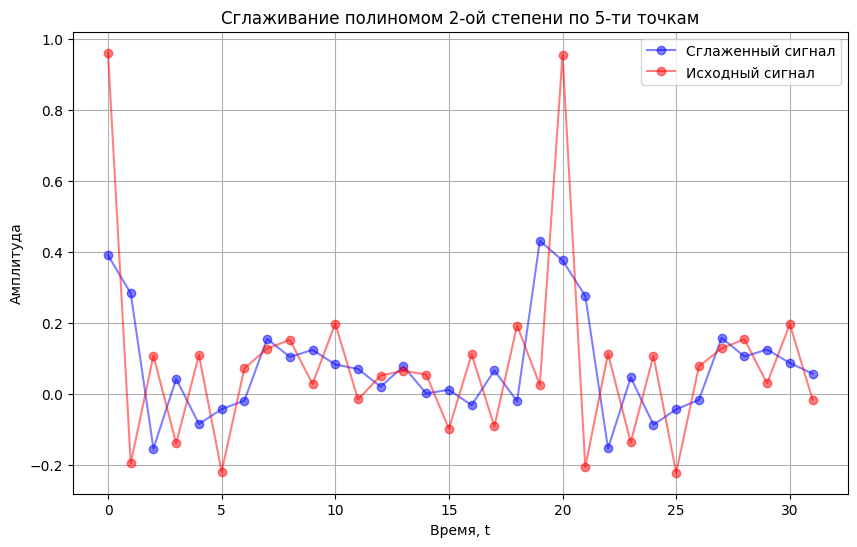

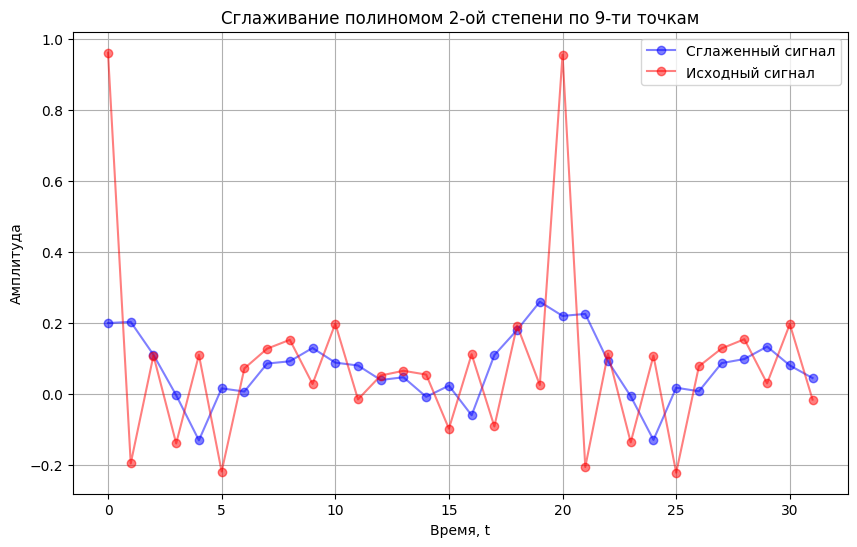

In [ ]:
plot_smoothing(t_x, digital_signal_5_poly2, "Сглаживание полиномом 2-ой степени по 5-ти точкам")
plot_smoothing(t_x, digital_signal_9_poly2, "Сглаживание полиномом 2-ой степени по 9-ти точкам")

Визуализация спектров сглаженных дискретных сигналов с помощью полиномов 2-ой степени

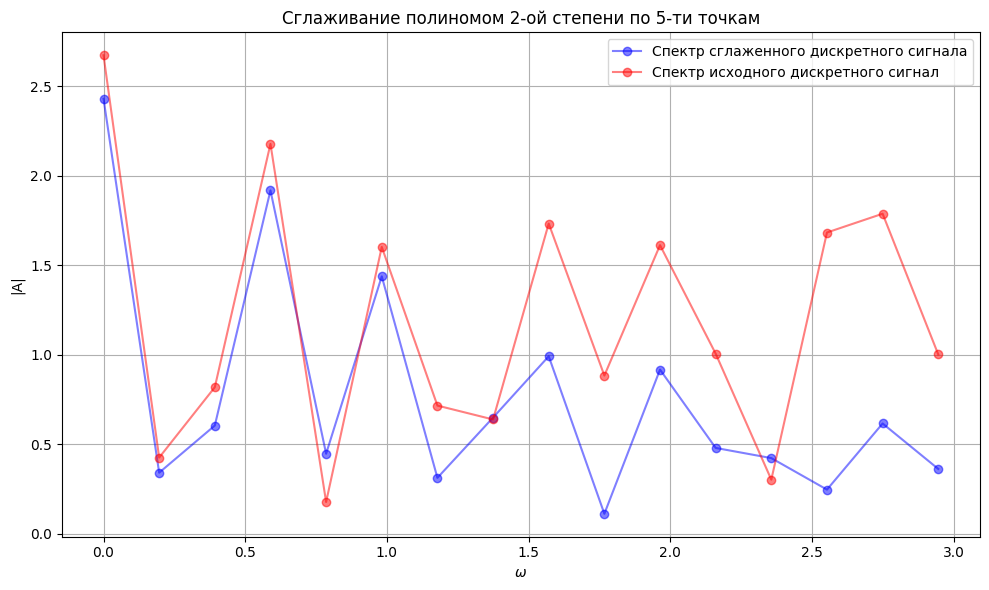

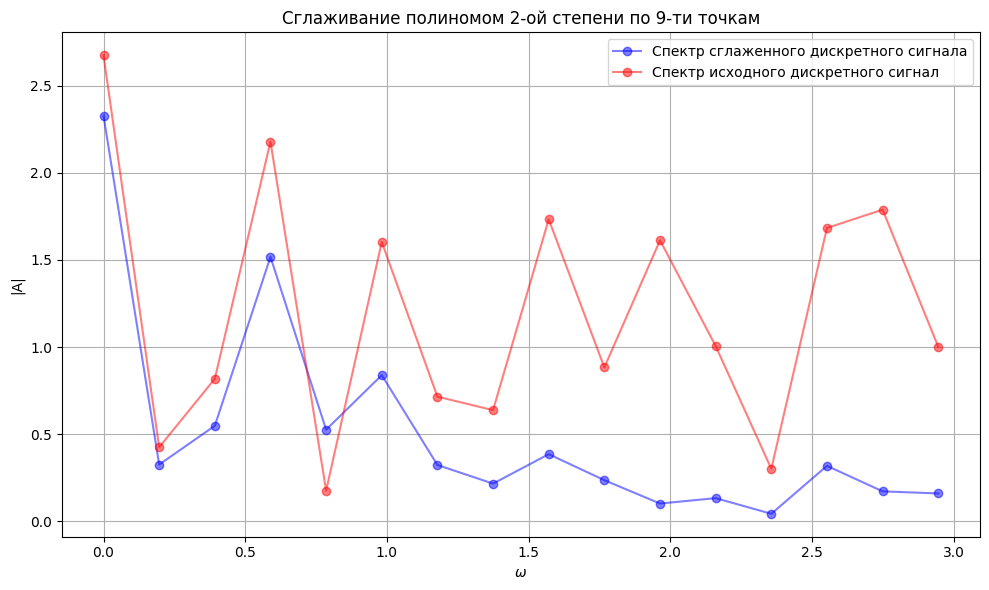

In [ ]:
dpf_poly2_5 = dft(digital_signal_5_poly2)[:N//2]
dpf_poly2_9 = dft(digital_signal_9_poly2)[:N//2]


plot_spectrum(dpf_poly2_5, "Сглаживание полиномом 2-ой степени по 5-ти точкам")
plot_spectrum(dpf_poly2_9, "Сглаживание полиномом 2-ой степени по 9-ти точкам")

Применяя функции сглаживания полиномом 2-ой степени, амплитуда дискретного сигнала уменьшается, причем подавление увеличивается с увеличением числа точек, используемых в фильтрации, однако форма сигнала сохраняется лучше, чем при линейном сглаживании.

При построении спектров исходного дискретного сигнала и дискретных сигналов с применением данной фильтрации видно, что с увеличением частоты, также увеличивается и подавление амплитуды, с увеличением числа точек в фильтре, подавление сильнее и наступает на меньших частотах. Однако, сильное подавление начинается позже ( на больших частотах), чем при линейном сглаживании.


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


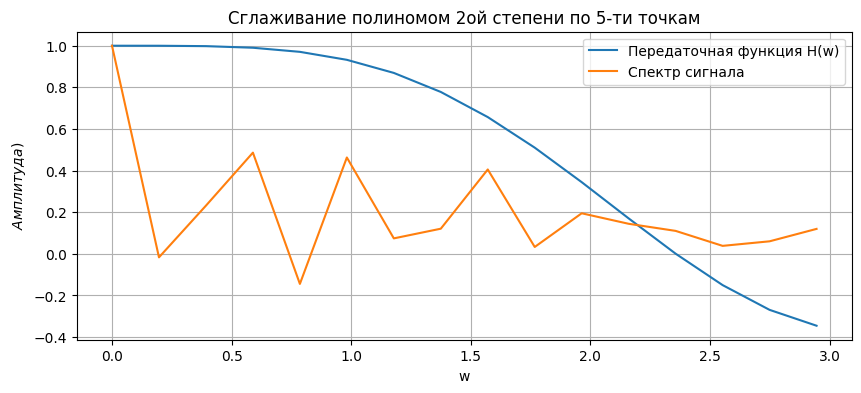

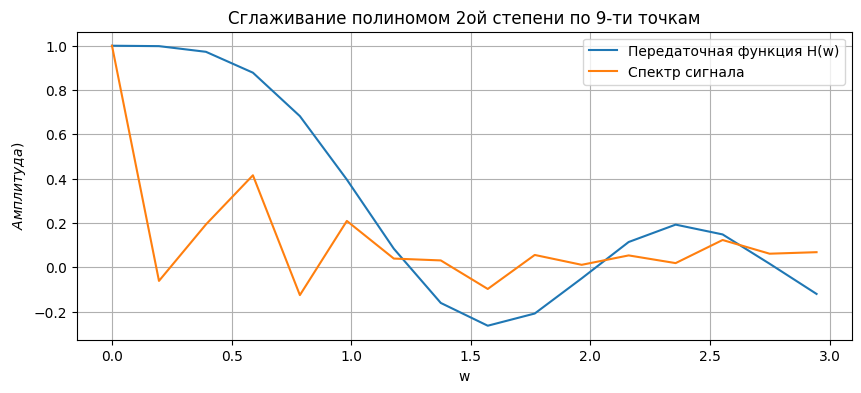

In [ ]:
#функция вычисления
def H(w, koefs, s):
    curr_h = koefs[0]
    for i in range(1, len(koefs)):
      curr_h += koefs[i]*np.cos(i*omega[:N//2])
    return curr_h / s

omega = 2 * np.pi * np.arange(N) / N

#коэффициенты
k5 = [17, 24, -6]
k9 = [59,108,78,28,-42]

s5 = 35
s9 = 231

#Вычисление функции
h_poly2_5 = H(omega[:N//2], k5, s5)
h_poly2_9 = H(omega[:N//2], k9, s9)

#построение графика
plt.figure(figsize=(10, 4))
plt.plot(omega[:N//2], h_poly2_5, label=f'Передаточная функция H(w)')
plt.plot(omega[:N//2], dpf_poly2_5/max(dpf_poly2_5), label=f'Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда)$')
plt.title('Сглаживание полиномом 2ой степени по 5-ти точкам')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(omega[:N//2], h_poly2_9, label=f'Передаточная функция H(w)')
plt.plot(omega[:N//2], dpf_poly2_9/max(dpf_poly2_9), label=f'Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда)$')
plt.title('Сглаживание полиномом 2ой степени по 9-ти точкам')
plt.legend()
plt.grid(True)
plt.show()

При сравнении передаточной функции фильтра второго порядка, построенной по 5 и 9 узлам, со спектром дискретного сигнала, полученным с помощью ДПФ, видно, что их частотные зависимости также хорошо совпадают. Следовательно, вычисленный спектр корректно отражает частотные свойства фильтра и соответствует теоретической передаточной функции.

**9.** Сглаживание полиномом четвертой степени

Формула для сглаживания полиномом четвертой степени для 7-ми и 11-ти узлов:

$$y_7= \frac{1}{231}(5s_{n-3}-30s_{n-2}+75s_{n-1}+131s_n+75s_{n+1}-30s_{n+2}+5s_{n+3})$$

$$y_{11}= \frac{1}{429}(18s_{n-5}-45s_{n-4}-10s_{n-3}+60s_{n-2}+120s_{n-1}+143s_n+120s_{n+1}+60s_{n+2}-10s_{n+3}-45s_{n+4}+18s_{n+5})$$

Получим формулу передаточной функции $H(\omega)$ для данного фильтра:

Так как $s_n = e^{i\omega n}$:

$$y7_n = \frac{1}{231}(5e^{(n-3)i\omega}-30e^{(n-2)i\omega}+75e^{(n-1)i\omega}+131e^{ni\omega}+75e^{(n+1)i\omega}-30e^{(n+2)i\omega}+5e^{(n-3)i\omega}) = \frac{1}{231}(5e^{-3i\omega}-30e^{-2i\omega}+75e^{-i\omega}+131+75e^{i\omega}-30e^{2i\omega}+5e^{3i\omega})e^{ni\omega}= H(\omega)*e^{ni\omega}$$

$$H(\omega) =\frac{1}{231}(5e^{-3i\omega}-30e^{-2i\omega}+75e^{-i\omega}+131+75e^{i\omega}-30e^{2i\omega}+5e^{3i\omega})= \frac{1}{231}(131+150cos(\omega)-60cos(2\omega)+10cos(3\omega))
$$

Аналогично для 11-ти точек:

$$H(\omega) = \frac{1}{429}(18e^{-5i\omega}-45e^{-4i\omega}-10e^{-3i\omega}+60e^{-2i\omega}+120e^{-i\omega}+143+120e^{i\omega}+60e^{2i\omega}-10e^{3i\omega}-45e^{4i\omega}+18e^{5i\omega}) = \frac{1}{429}(143+240cos(\omega)+120cos(2\omega)-20cos(3\omega)-90cos(4\omega)+36cos(5\omega))
$$


In [ ]:
#функция вычисления сглаживания полинимом 4-ой степени
def poly4_filter(n, x, koeffs, alpha_):
  y = np.zeros_like(x)
  half_window_size = (n - 1) // 2

  for i in range(len(x)):
      s = 0
      for k in range(-half_window_size, half_window_size + 1):
          idx = i + k
          if 0 <= idx < len(x):
              s += x[idx]*koeffs[k+half_window_size]
      y[i] = s / alpha_
  return y

koeffs_7 = [5, -30, 75, 131, 75, -30, 5]
koeffs_11 = [18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]
digital_signal_7_poly4 = poly4_filter(7, digital_signal, koeffs_7, 231)
digital_signal_11_poly4 = poly4_filter(11, digital_signal, koeffs_11, 429)

Визуализация сглаженных дискретных сигналов с помощью полиномов 4-ой степени

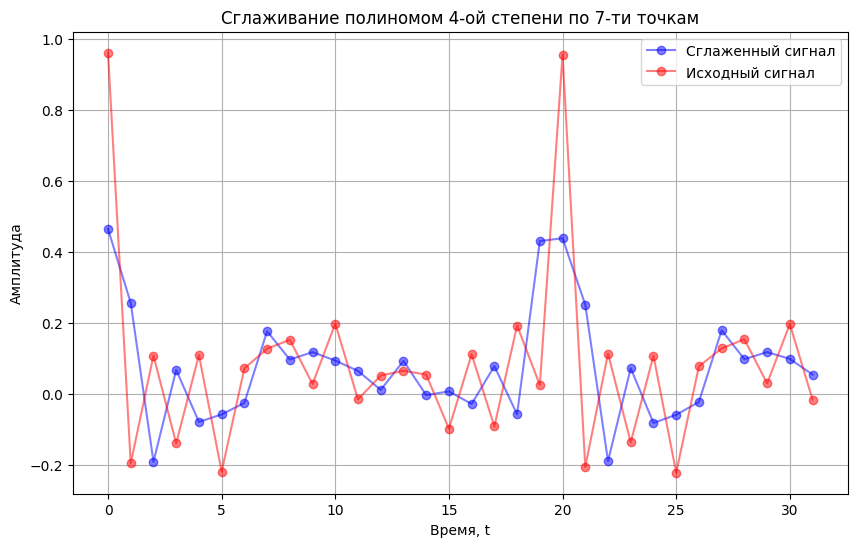

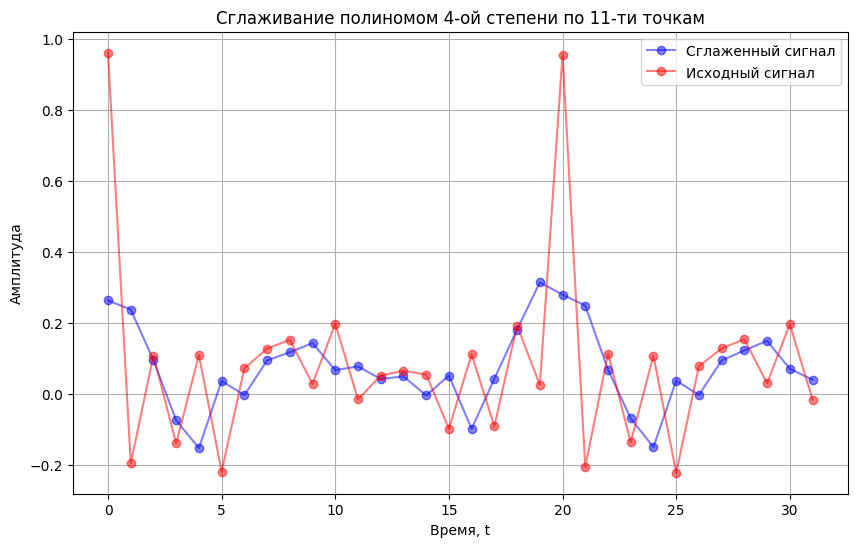

In [ ]:
plot_smoothing(t_x, digital_signal_7_poly4, "Сглаживание полиномом 4-ой степени по 7-ти точкам")
plot_smoothing(t_x, digital_signal_11_poly4, "Сглаживание полиномом 4-ой степени по 11-ти точкам")

Визуализация спектров сглаженных дискретных сигналов с помощью полиномов 4-ой степени

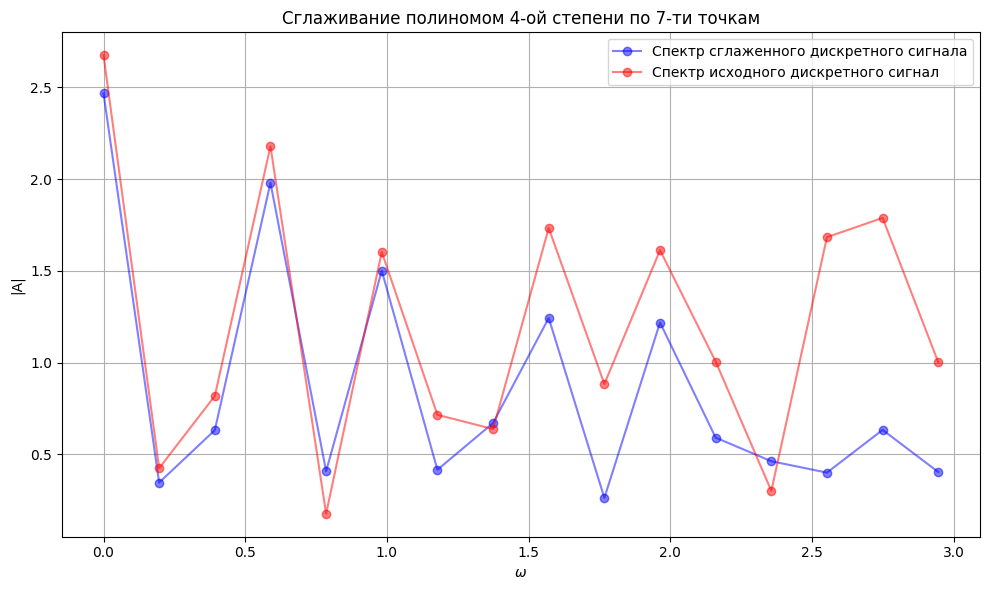

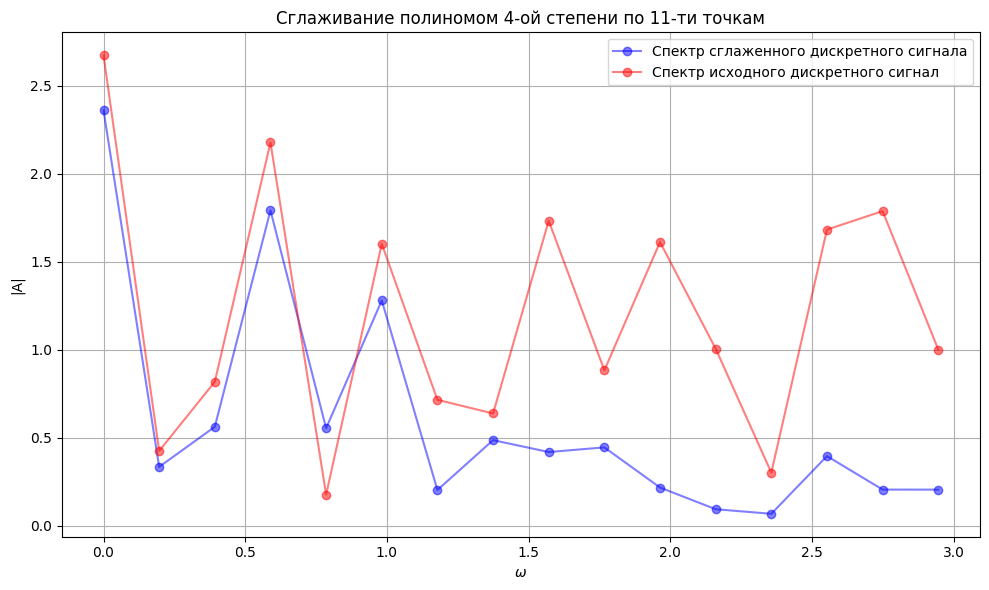

In [ ]:
dpf_poly4_7 = dft(digital_signal_7_poly4)[:N//2]
dpf_poly4_11 = dft(digital_signal_11_poly4)[:N//2]


plot_spectrum(dpf_poly4_7, "Сглаживание полиномом 4-ой степени по 7-ти точкам")
plot_spectrum(dpf_poly4_11, "Сглаживание полиномом 4-ой степени по 11-ти точкам")

Применяя функции сглаживания полиномом 4-ой степени, амплитуда дискретного сигнала также уменьшается, причем подавление увеличивается с увеличением числа точек, используемых в фильтрации, однако форма сигнала сохраняется лучше, чем при сглаживании полиномом 2-ой степени.

При построении спектров исходного дискретного сигнала и дискретных сигналов с применением данной фильтрации видно, что с учвеличением частоты, также увеличивается и подавление амплитуды, с увеличением числа точек в фильтре, подавление сильнее и наступает на меньших частотах. Однако, сильное подавление начинается позже ( на больших частотах), чем при сглаживании полиномом 2-ой степени.

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


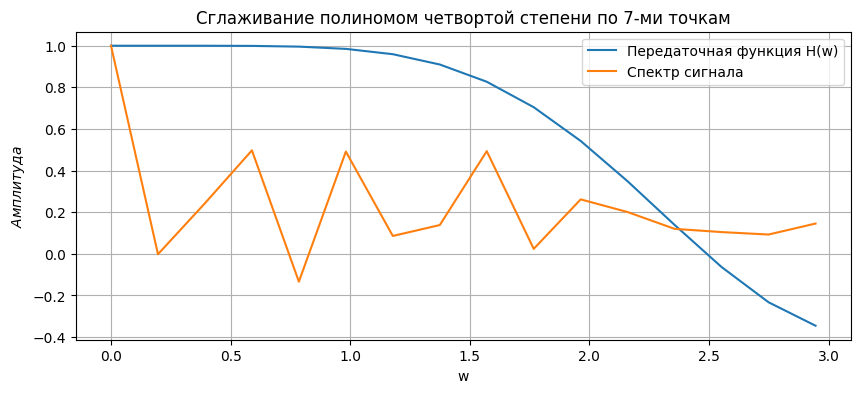

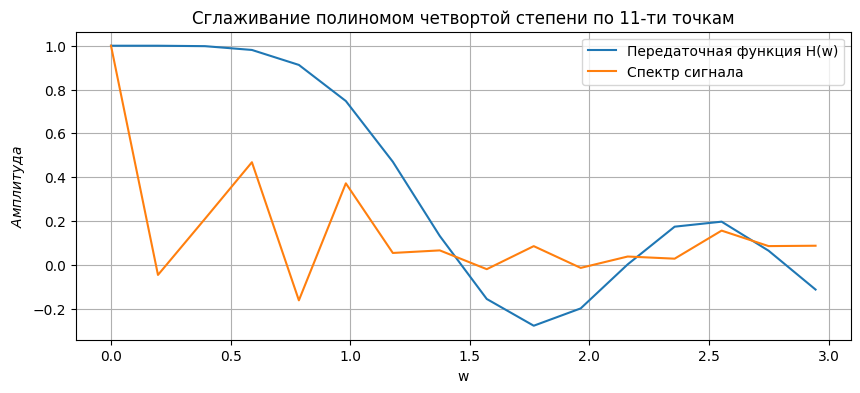

In [ ]:
#функция вычисления
def H(w, koefs, s):
    curr_h = koefs[0]
    for i in range(1, len(koefs)):
      curr_h += koefs[i]*np.cos(i*omega[:N//2])
    return curr_h / s

omega = 2 * np.pi * np.arange(N) / N

#коэффициенты
k7 = [131,150,-60,10]
k11 = [143,240,120,-20,-90,36]

s7 = 231
s11 = 429

#Вычисление функции
h_poly4_7 = H(omega[:N//2], k7, s7)
h_poly4_11 = H(omega[:N//2], k11, s11)

#построение графика
plt.figure(figsize=(10, 4))
plt.plot(omega[:N//2], h_poly4_7, label='Передаточная функция H(w)')
plt.plot(omega[:N//2], dpf_poly4_7/max(dpf_poly4_7), label='Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание полиномом четвортой степени по 7-ми точкам')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(omega[:N//2], h_poly4_11, label='Передаточная функция H(w)')
plt.plot(omega[:N//2], dpf_poly4_11/max(dpf_poly4_11), label='Спектр сигнала')
plt.xlabel('w')
plt.ylabel('$Амплитуда$')
plt.title('Сглаживание полиномом четвортой степени по 11-ти точкам')
plt.legend()
plt.grid(True)
plt.show()

При сравнении передаточной функции фильтра четвертого порядка, построенной по 7 и 11 узлам, со спектром дискретного сигнала, полученным с помощью ДПФ, видно, что их частотные зависимости хорошо совпадают, как и в предыдущих фильтрах. Следовательно, вычисленный спектр корректно отражает частотные свойства фильтра и соответствует теоретической передаточной функции.

**10.** Вывод по практической работе

В ходе лабораторной работы сгенерирован дискретный сигнал посредством дискретизации исходного аналогового сигнала с шагом T = 1. К полученному дискретному сигналу применены 3 фильтра: линейное сглаживание, сглаживание полиномами 2-ой и 4-ой степени. Также для полученных дискретных сигналов построены дискретные отсчеты спекторов этих сигналов.

При анализе графиков получено, что каждый фильтр подавляет амплитуду сигнала с увеличением частоты, однако при увеличении степени полинома подавление возникаеи позже, на более высокой частоте. Такое же поведение видно и на графиках спекторв сигналов.

Проведен анализ спектра дискретного сигнала и передаточной функции фильтров и получено, что аналитические передаточные функции и спектры ДПФ практически полностью совпадают по форме. Это подтверждает корректность как аналитических выражений, так и численных алгоритмов, использованных для построения фильтров.